In [1]:
import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

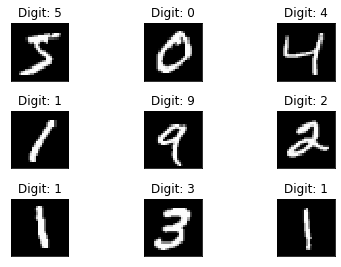

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28)


In [21]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [16]:
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [36]:
#Version 1
#https://sakura-gh.github.io/ML-notes/ML-notes-html/11_Convolutional-Neural-Network-part1.html
import numpy
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils

##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape = (28, 28, 1)))
#32 convolution filters used each of size 3x3
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['accuracy'])

In [37]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [38]:
model.fit(X_train, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3227 - accuracy: 0.9029
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1299 - accuracy: 0.9613
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1000 - accuracy: 0.9697
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0822 - accuracy: 0.9754
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0752 - accuracy: 0.9767
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0673 - accuracy: 0.9790
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0512 - accuracy: 0.9833
Epoch 9/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0484 - accuracy: 0.9842
Epoch 10/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0445 - accuracy: 0.9855

In [39]:
    result_train = model.evaluate (X_train, y_train)
    print ( '\nTrain CNN Acc:\n' , result_train[1])
    result_test = model.evaluate (X_test ,y_test)
    print ( '\nTest CNN Acc:\n' , result_test[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9992

Train CNN Acc:
 0.9991833567619324
313/313 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9893

Test CNN Acc:
 0.989300012588501
